# Принадлежность точки выпуклому многоугольнику

## Описание алгоритма
Нам даются точки ($a_i$) - вершины многоугольника в порядке обхода и искомая точка ($p$). У выпуклого многоугольника есть свойство: для любой точки все остальные точки отсортированы по углу. 
* Возьмем первую точку в списке вершин
* Проверим, что точка справа (поврот больше нуля) от прилежащих к ней вершин 
* Если это не так, то точка находится вне многоугольника
* Иначе, будем искать бин-поиском в каком углу лежит точка, т. е. найдем такое i, что поворот ($a_{i}$, $a_{n}$, $p$) и ($a_{i+1}$, $a_{n}$, $p$) различный.
*  Проверяем, точка справа или слева от ребра ($a_i$,$a_{i+1}$). Если справа, то внутри, иначе снаружи

## Время работы
Время работы бин-поиска $O(log(n))$

## Визуализация
Данный код показывает примерно как работает алгоритм. Он не совсем верный, так как используется факт, что первая точка самая правая. Для лучшего понимания алгоритма рекомендуется переписать функции $check$ и $findTreangle$. 
Для упрощения написания есть функции $drawLine$, которая рисует отрезок и $drawPoint$. У них сигнатура: $drawLine(<$начальная точка$>,<$конечная точка$>,<$(не обязательно) цвет$>,<$(не обязательно) вид отрезка$>)$; $drawPoint(<$точка$>,<$(не обязательно) цвет$>,<$(не обязательно) вид$>)$


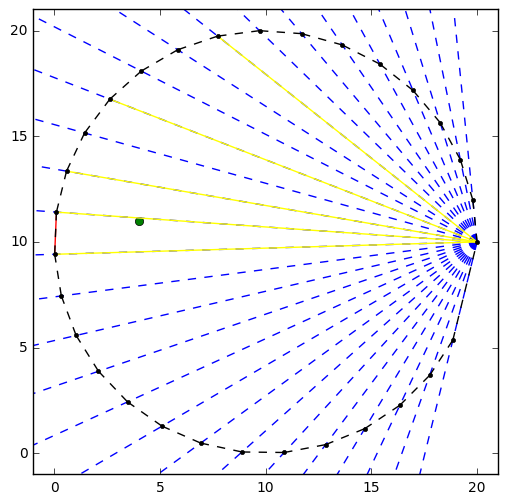

'in'

In [2]:
from random import randint
import numpy as np

import matplotlib.pyplot as plt

from ipywidgets import interact
from IPython.display import display

MAX_X = 20
MIN_X = 0
MAX_Y = 20
MIN_Y = 0
COL_POINTS = 30

def generatefigure(N):
    points = {(6 * i / N, 6 * i / N) for i in range(N)}
    points=list(list(x) for x in points)
    points.sort()
    for i in range(len(points)):
        x = MAX_X - MIN_X
        y = MAX_Y - MIN_Y
        if x < 0 or y < 0:
            raise Exception("MAX should be more then MIN") 
        if x - N / 2 < 0 or y - N / 2 < 0:
            raise Exception("Между MAX и MIN должен быть больше диапозон")
        points[i][0]=((np.cos(points[i][0]) + 1) * x / 2) + MIN_X
        points[i][1]=((np.sin(points[i][1]) + 1) * x / 2) + MIN_X
    return points


fig = plt.figure(figsize = (6, 6))
ax1 = plt.subplot(111, aspect = 'equal')

q = []

def redrawClosest(point):
    points = np.array(point)
    for i in range(len(points)):
        drawPoint(point[i], 'black')
        drawLine(point[i - 1], point[i], 'black','--')
        
def drawPoint(point, color = 'red', look = '.'):
    q1, = ax1.plot(point[0], point[1], look, color = color)
    q.insert(-1, q1)

def drawLine(pointStart, pointEnd, color = 'red', look = '-'):
    q1, = ax1.plot([pointStart[0], pointEnd[0]], [pointStart[1], pointEnd[1]], look, color = color)
    q.insert(-1, q1)   

        
def drawTreangles(points, color):
    lines = {(i, i, i) for i in range(len(points) - 2)}
    lines = list(list(x) for x in lines)
    for i in range(1, len(points)):
        a = points[0][1] - points[i][1]
        b = points[i][0] - points[0][0]
        c = points[0][0] * points[i][1] - points[0][1] * points[i][0]
        x = MIN_X - 1
        y = (-c - a * x) / b
        point = [x, y]
        lines[i - 2] = [a, b, c]
        drawLine(points[0], point, 'blue', '--')
    return lines

def print(points):
    redrawClosest(points)
    ax1.set_xlim(MIN_X - 1, MAX_X + 1)
    ax1.set_ylim(MIN_Y - 1, MAX_X + 1)
    display(fig)

def onRelease(event):
    for i in range(len(q)):
        q[i].remove();
    q = []
    

points = generatefigure(COL_POINTS)

def sign(line, point):
    return line[0] * point[0] + line[1] * point[1] + line[2] > 0
    
def findTreangle(point, lines):
    start = 0
    end = len(lines)
    while(start < end - 1):
        midl = start + (end - start) // 2
        [a, b, c] = lines[midl]
        drawLine(points[0], points[midl+2], 'yellow', '-')
        if a * point[0] + b * point[1] + c is 0:
            return midl
        if sign(lines[midl], point):
            start = midl
        else:
            end = midl
    return start

def check(points, point):
    if point[0] < points[0][0]:
        l = findTreangle(point, lines)
        p1 = points[l + 2]
        p2 = points[(l + 3) % len(points)]
        drawLine(p1, p2, 'red', '-')
        a = p1[1] - p2[1]
        b = p2[0] - p1[0]
        c = p1[0] * p2[1] - p1[1] * p2[0]
        if sign([a, b, c], point):
            return 'in'
        else:
            return 'out'
    else:
        drawLine([points[0][0], MIN_Y - 1], [points[0][0], MAX_Y + 1], 'red', '-')
        return 'out'

fig.canvas.mpl_connect('button_release_event', onRelease)
point = [randint(MIN_X, MAX_X), randint(MIN_Y, MAX_Y)]
drawPoint(point,'green','o')
lines = drawTreangles(points, 'blue')
l = -1
result = check(points, point)
print(points)
plt.close()
result



# Принадлежность точки не выпоклому многоугольнику
## Алгоритм
* Мысленно проведем вертикальный луч из данной точки.
* Посчитаем количество пересечений с гранями многоугольника: 
    Переберем все ребра (a,b) по таким правилам:
    * Если точка $p$ лежит на ребре, то точка лежит в многоугольнике,
    * Если у ребра $a_x$ = $b_x$, то пропускаем его,
    * Если у ребра $p_x=max(a_x,b_x)$ и координата у правой точки ребра по $y$ больше $p_y$, то увеличиваем счетчик пересечений на $1$,
    * Если у ребра $p_x = min(a_x,b_x)$ и координата у левой точки ребра по $y$ больше $p_y$, то пропускаем,
    * Если $a_x<p_x<b_x$ или $b_x<p_x<a_x$ и поворот точек $(a,b,p)$ левый, то увеличиваем счетчик пересечений на $1$,
* Если количество пересечений четно, то точка лежит вне многоугольника, иначе точка лежит внутри.

## Время работы
На каждое ребро тратится $O(1)$ времени, значит алгоритм работает за $O(n)$, где $n$ - количество вершин многоугольника.

## Визуализация 

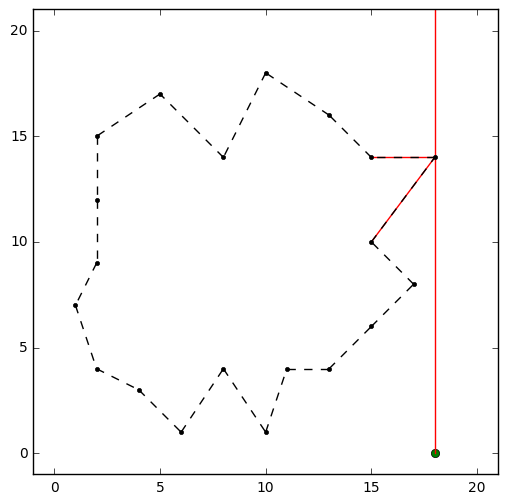

'out'

In [1]:
from random import randint
import numpy as np
import math, random

import matplotlib.pyplot as plt

from ipywidgets import interact
from IPython.display import display

MAX_X = 20
MIN_X = 0
MAX_Y = 20
MIN_Y = 0
COL_POINTS = 20

def generateFigure(ctrX, ctrY, aveRadius, irregularity, spikeyness, numVerts):
    irregularity = clip( irregularity, 0,1 ) * 2*math.pi / numVerts
    spikeyness = clip( spikeyness, 0,1 ) * aveRadius

    # generate n angle steps
    angleSteps = []
    lower = (2*math.pi / numVerts) - irregularity
    upper = (2*math.pi / numVerts) + irregularity
    sum = 0
    for i in range(numVerts) :
        tmp = random.uniform(lower, upper)
        angleSteps.append( tmp )
        sum = sum + tmp

    # normalize the steps so that point 0 and point n+1 are the same
    k = sum / (2*math.pi)
    for i in range(numVerts) :
        angleSteps[i] = angleSteps[i] / k

    # now generate the points
    points = []
    angle = random.uniform(0, 2*math.pi)
    for i in range(numVerts) :
        r_i = clip( random.gauss(aveRadius, spikeyness), 0, 2*aveRadius )
        x = ctrX + r_i*math.cos(angle)
        y = ctrY + r_i*math.sin(angle)
        points.append( (int(x),int(y)) )

        angle = angle + angleSteps[i]

    return points

def clip(x, min, max) :
    if( min > max ) :  return x    
    elif( x < min ) :  return min
    elif( x > max ) :  return max
    else :             return x


fig = plt.figure(figsize = (6, 6))
ax1 = plt.subplot(111, aspect = 'equal')

q = []

def redrawClosest(point):
    points = np.array(point)
    for i in range(len(points)):
        drawPoint(point[i], 'black')
        drawLine(point[i - 1], point[i], 'black','--')
        
def drawPoint(point, color = 'red', look = '.'):
    q1, = ax1.plot(point[0], point[1], look, color = color)
    q.insert(-1, q1)

def drawLine(pointStart, pointEnd, color = 'red', look = '-'):
    q1, = ax1.plot([pointStart[0], pointEnd[0]], [pointStart[1], pointEnd[1]], look, color = color)
    q.insert(-1, q1)   
    
def print(points):
    redrawClosest(points)
    ax1.set_xlim(MIN_X - 1, MAX_X + 1)
    ax1.set_ylim(MIN_Y - 1, MAX_X + 1)
    display(fig)

def onRelease(event):
    for i in range(len(q)):
        q[i].remove();
    q = []

def sign(point1, point2, point): 
    v = (point[0] - point1[0]) * (point2[1] - point[1]) - (point[1] - point1[1]) * (point2[0] - point[0]) 
    return -1 if v < 0 else 0 if v is 0 else 1

def isBetween(point1, point2, point):
    x1 = min(point1[0], point2[0])
    x2 = max(point1[0], point2[0])
    y1 = min(point1[1], point2[1])
    y2 = max(point1[1], point2[1])
    return x1 <= point[0] and point[0] <= x2 and y1 <= point[1] and y2 <= point[1]

def check(points, point):
    drawLine(point, [point[0], MAX_Y + 1])
    flage = 0
    for i in range(-1, len(points) - 1):
        x1 = min(points[i][0], points[i + 1][0])
        x2 = max(points[i + 1][0], points[i][0])
        y1 = min(points[i][1], points[i + 1][1])
        y2 = max(points[i][1], points[i + 1][1])
        a = points[i][1] - points[i + 1][1]
        b = points[i + 1][0] - points[i][0]
        c = points[i][0] * points[i + 1][1] - points[i][1] * points[i + 1][0]
        if (sign(point, points[i], points[i + 1]) is 0) and isBetween(points[i], points[i + 1], point):
            return 'in'
        if (b is 0):
            continue
        if (x1 > point[0] or x2 < point[0]) or (y2 < point[1]):
            continue
        if (point[0] is x2 and ((points[i][0] is x2 and points[i][1] > point[1]) or (points[i + 1][0] is x2 and points[i + 1][1] > point[1]))):
            flage = flage + 1
            drawLine(points[i], points[i + 1], 'red', '-')
            continue
        if (point[0] is x1 and ((points[i][0] is x1 and points[i][1] > point[1]) or (points[i + 1][0] is x1 and points[i + 1][1] > point[1]))):
            continue
        if (y1 > point[1] and x1 < point[0] and x2 > point[0]):
            flage = flage + 1
            drawLine(points[i], points[i + 1], 'yellow', '-')
            continue
        if (not sign(points[i], points[i + 1], [point[0], MAX_Y + 1]) is sign(points[i], points[i + 1], point)) and (not sign(point, [point[0], MAX_Y + 1], points[i]) is sign(point, [point[0], MAX_Y + 1], points[i + 1])):
            flage = flage + 1
            drawLine(points[i], points[i + 1], 'green', '-')
            continue
    return 'in' if flage % 2 is 1 else 'out'

fig.canvas.mpl_connect('button_release_event', onRelease)
size_x = MAX_X - MIN_X - 1
if size_x < 0:
    raise Exception('MAX_X must be more than MIN_X')
size_y = MAX_Y - MIN_Y - 1
if size_y < 0:
    raise Exception('MAX_Y must be moer than MIN_Y')
points = generateFigure(MIN_X + size_x / 2, MIN_Y + size_y / 2, min(size_x, size_y) / 2.5, 0.35, 0.2, COL_POINTS)
point = [randint(MIN_X, MAX_X), randint(MIN_Y, MAX_Y)]
drawPoint(point, 'green', 'o')
result = check(points, point)
print(points)
plt.close()
result